In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Krok 1: Generowanie danych
np.random.seed(0)
data = {
    "hostname": [f"vm-{i+1}" for i in range(10)],
    "cpu_usage": np.random.randint(10, 96, 10),
    "memory_gb": np.random.randint(2, 33, 10),
    "uptime_h": np.random.randint(0, 1001, 10)
}
df = pd.DataFrame(data)
print("Dane wejściowe:\n", df)

Dane wejściowe:
   hostname  cpu_usage  memory_gb  uptime_h
0     vm-1         54         26       849
1     vm-2         57         26       677
2     vm-3         74         14       537
3     vm-4         77         28       845
4     vm-5         77          3        72
5     vm-6         19          8       777
6     vm-7         93          9       916
7     vm-8         31         25       115
8     vm-9         46         16       976
9    vm-10         80         26       755


In [11]:
# Krok 2: Analiza
# a) Top 3 maszyny wg CPU
top_cpu = df.sort_values("cpu_usage", ascending=False).head(3)
print("\nTop 3 maszyny wg CPU:\n", top_cpu)


Top 3 maszyny wg CPU:
   hostname  cpu_usage  memory_gb  uptime_h
6     vm-7         93          9       916
9    vm-10         80         26       755
3     vm-4         77         28       845


In [12]:
# b) Średni uptime
avg_uptime = df["uptime_h"].mean()
print(f"\nŚredni uptime: {avg_uptime:.2f} h")


Średni uptime: 651.90 h


In [13]:
# c) Liczba maszyn z RAM > 16 GB
count_ram = (df["memory_gb"] > 16).sum()
print(f"\nLiczba maszyn z RAM > 16 GB: {count_ram}")


Liczba maszyn z RAM > 16 GB: 5


In [14]:
# Krok 3: Eksport do CSV
df.to_csv("dane_maszyn.csv", index=False)
print("\nDane zostały zapisane do pliku dane_maszyn.csv")


Dane zostały zapisane do pliku dane_maszyn.csv


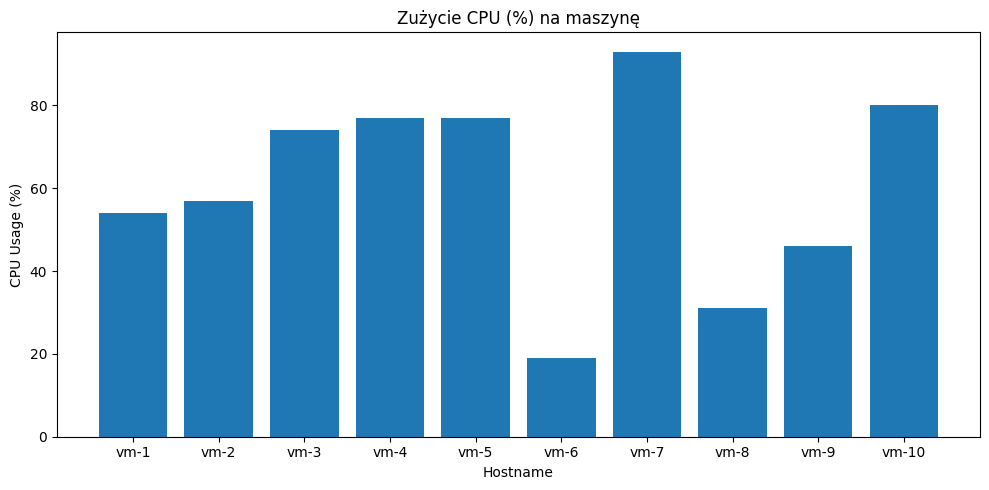

In [15]:
# Krok 4a: Wykres słupkowy – zużycie CPU
plt.figure(figsize=(10, 5))
plt.bar(df["hostname"], df["cpu_usage"])
plt.title("Zużycie CPU (%) na maszynę")
plt.xlabel("Hostname")
plt.ylabel("CPU Usage (%)")
plt.tight_layout()
plt.show()

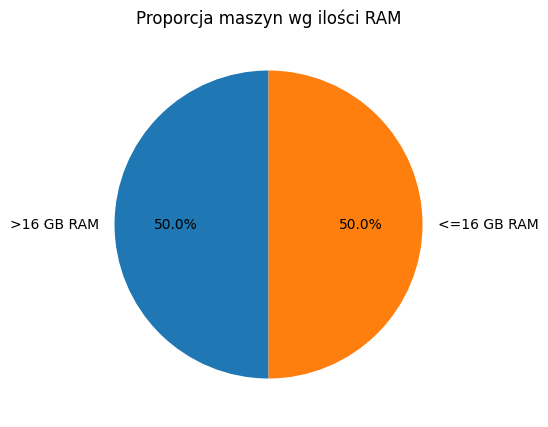

In [16]:
# Krok 4b: Wykres kołowy – udział maszyn wg RAM
labels = ['>16 GB RAM', '<=16 GB RAM']
sizes = [
    (df["memory_gb"] > 16).sum(),
    (df["memory_gb"] <= 16).sum()
]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Proporcja maszyn wg ilości RAM")
plt.show()